**Student Feedback Survey**

In this project, text and rating-based feedback are analyzed which are submitted by students after attending campus events. Also I've work with real Google Forms data (CSV) and use Natural Language Processing (NLP) to understand satisfaction levels and identify areas for improvement.

**Import essential libraries for this project**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data (student_feedback.csv) file**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving student_feedback.csv to student_feedback.csv


**Load and Inspect Dataset**

In [3]:
df = pd.read_csv('student_feedback.csv')
print("Dataset Loaded Successfully!\n")
print("Shape:", df.shape)
display(df.head())

# Show basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isna().sum())

Dataset Loaded Successfully!

Shape: (1001, 10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-

**Data cleaning & Column Setup**

In [4]:
exclude = {'Unnamed: 0', 'Student ID', 'StudentID', 'ID', 'id'}
rating_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in exclude]

print("\nRating Columns Detected:")
print(rating_cols)

# Handle missing numeric values (if any)
df[rating_cols] = df[rating_cols].fillna(df[rating_cols].mean())

# Ensure all ratings are within valid range (1–10)
for c in rating_cols:
    df[c] = df[c].clip(1, 10)

df[rating_cols].describe()


Rating Columns Detected:
['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Statistical Summary**

In [5]:
stats = df[rating_cols].agg(['mean', 'std', 'min', 'max']).T.sort_values('mean', ascending=False)
print("Average Ratings per Question:")
display(stats)

Average Ratings per Question:


,mean,std,min,max
Well versed with the subject,7.497502,1.692998,5.0,10.0
Explains concepts in an understandable way,6.081918,2.597168,2.0,10.0
Use of presentations,5.942058,1.415853,4.0,8.0
Provides support for students going above and beyond,5.662338,2.891690,1.0,10.0
Structuring of the course,5.636364,2.920212,1.0,10.0
Course recommendation based on relevance,5.598402,2.886617,1.0,10.0
Solves doubts willingly,5.474525,2.874648,1.0,10.0
Degree of difficulty of assignments,5.430569,2.869046,1.0,10.0


**Data Visualization**

Average Rating Per Question

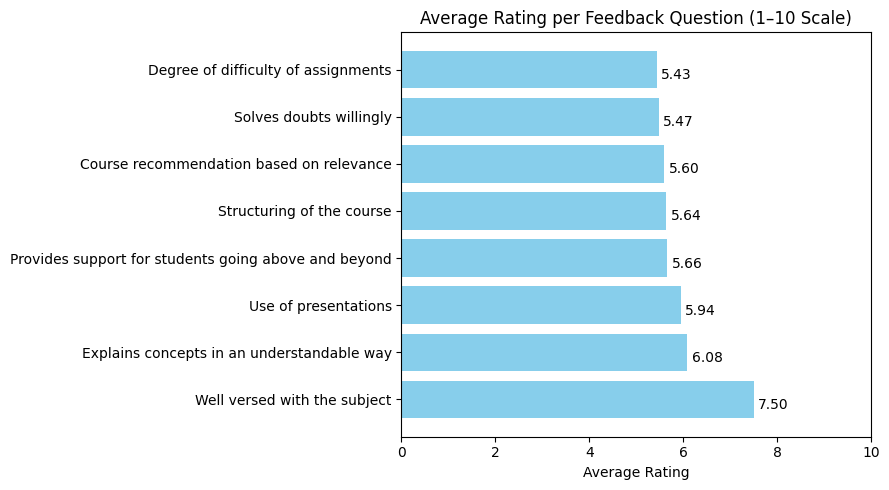

In [6]:
plt.figure(figsize=(9,5))
bars = plt.barh(stats.index, stats['mean'], color='skyblue')
plt.title('Average Rating per Feedback Question (1–10 Scale)')
plt.xlabel('Average Rating')
plt.xlim(0,10)
for bar in bars:
    plt.text(bar.get_width()+0.1, bar.get_y()+0.2, f"{bar.get_width():.2f}")
plt.tight_layout()
plt.show()

**Compute Overall Satisfaction Score**

In [7]:
df['mean_score'] = df[rating_cols].mean(axis=1)

conditions = [
    df['mean_score'] < 5,
    (df['mean_score'] >= 5) & (df['mean_score'] < 8),
    df['mean_score'] >= 8
]
choices = ['Dissatisfied (<5)', 'Neutral (5–8)', 'Satisfied (≥8)']
df['segment'] = np.select(conditions, choices, default='Other')

seg_counts = df['segment'].value_counts()
seg_percent = df['segment'].value_counts(normalize=True)*100
print("Satisfaction Segmentation:\n")
print(pd.DataFrame({'Count': seg_counts, 'Percent': seg_percent.round(1)}))

Satisfaction Segmentation:

                   Count  Percent
segment                          
Neutral (5–8)        851     85.0
Dissatisfied (<5)    138     13.8
Satisfied (≥8)        12      1.2


**Satisfaction Distribution (Histogram, Pie Chart)**

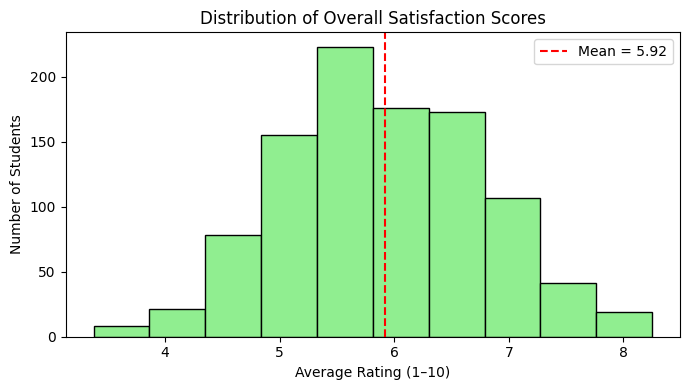

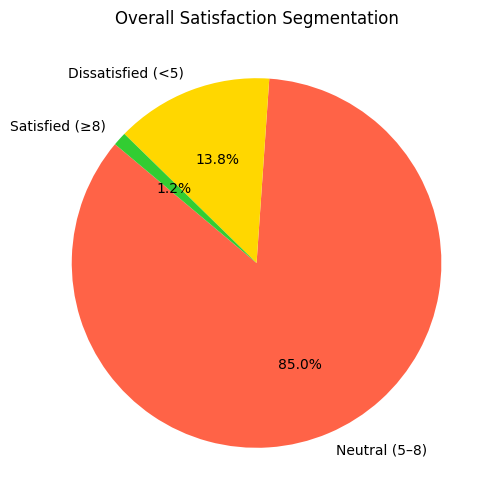

In [8]:
# Histogram
plt.figure(figsize=(7,4))
plt.hist(df['mean_score'], bins=10, edgecolor='black', color='lightgreen')
plt.axvline(df['mean_score'].mean(), color='red', linestyle='--', label=f"Mean = {df['mean_score'].mean():.2f}")
plt.title('Distribution of Overall Satisfaction Scores')
plt.xlabel('Average Rating (1–10)')
plt.ylabel('Number of Students')
plt.legend()
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(seg_counts, labels=seg_counts.index, autopct='%1.1f%%', startangle=140, colors=['tomato','gold','limegreen'])
plt.title('Overall Satisfaction Segmentation')
plt.show()


**Spread of Ratings (Boxplot)**

/tmp/ipython-input-3336349518.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[rating_cols].values, labels=rating_cols, patch_artist=True)


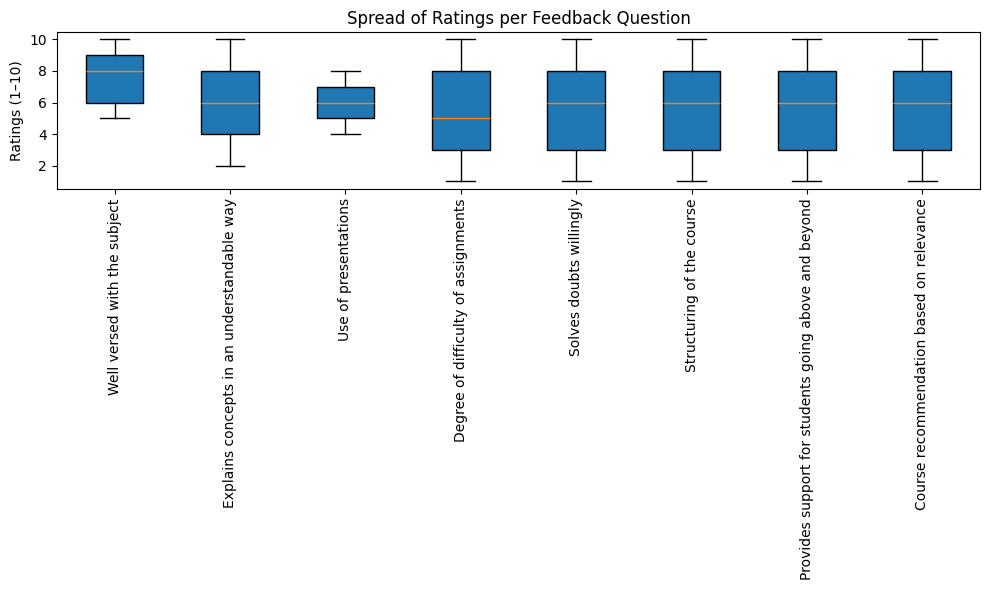

In [9]:
plt.figure(figsize=(10,6))
plt.boxplot(df[rating_cols].values, labels=rating_cols, patch_artist=True)
plt.xticks(rotation=90)
plt.ylabel("Ratings (1–10)")
plt.title("Spread of Ratings per Feedback Question")
plt.tight_layout()
plt.show()

**Correlation Analysis (Heatmap)**

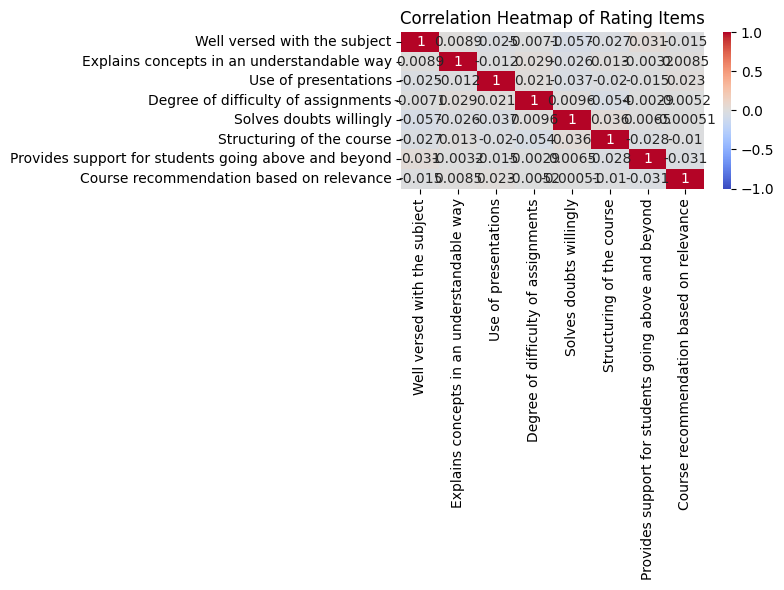


Top 5 Positive Correlations Between Rating Items:
Structuring of the course                 Solves doubts willingly                                 0.036062
Well versed with the subject              Provides support for students going above and beyond    0.031488
Degree of difficulty of assignments       Explains concepts in an understandable way              0.029484
Course recommendation based on relevance  Use of presentations                                    0.023173
Use of presentations                      Degree of difficulty of assignments                     0.020918
dtype: float64


In [10]:
corr = df[rating_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Rating Items")
plt.tight_layout()
plt.show()

# Display top correlations
np.fill_diagonal(corr.values, 0)
corr_pairs = corr.unstack().sort_values(ascending=False).drop_duplicates().head(5)
print("\nTop 5 Positive Correlations Between Rating Items:")
print(corr_pairs)

**Top & Bottom Performing Areas**

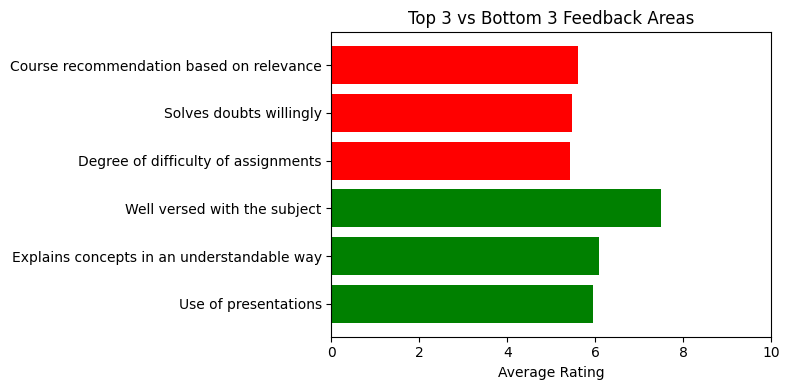


Top 3 Performing Aspects:


,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058



Bottom 3 Performing Aspects:


,0
Degree of difficulty of assignments,5.430569
Solves doubts willingly,5.474525
Course recommendation based on relevance,5.598402


In [11]:
mean_ratings = df[rating_cols].mean().sort_values()

plt.figure(figsize=(8,4))
top3 = mean_ratings.tail(3)
bottom3 = mean_ratings.head(3)

plt.barh(top3.index, top3.values, color='green')
plt.barh(bottom3.index, bottom3.values, color='red')
plt.xlabel('Average Rating')
plt.title('Top 3 vs Bottom 3 Feedback Areas')
plt.xlim(0,10)
plt.tight_layout()
plt.show()

print("\nTop 3 Performing Aspects:")
display(top3[::-1])
print("\nBottom 3 Performing Aspects:")
display(bottom3)


** SUMMARY:**

• Total Responses: 1001

• Overall Mean Satisfaction: 5.92/10

• Satisfied: 12 (1.2%)

• Neutral: 851 (85.0%)

• Dissatisfied: 138 (13.8%)

 ** Observations:**

• Faculty are strong in subject knowledge (avg ~7.5).

• Assignments & doubt solving need focus (avg ~5.4–5.5).

• 85% students are neutral — focus here to improve satisfaction